In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

A local school district has a goal to reach a 95% graduation rate by the end of the
decade by identifying students who need intervention before they drop out of
school. As a software engineer contacted by the school district, your task is to
model the factors that predict how likely a student is to pass their high school final
exam, by constructing an intervention system that leverages supervised learning
techniques. The board of supervisors has asked that you find the most effective
model that uses the least amount of computation costs to save on the budget. You
will need to analyze the dataset on students' performance and develop a model
that will predict a given student will pass, quantifying whether an intervention is
necessary.

In [449]:
data=pd.read_csv("student-data.csv")

In [450]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [451]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [452]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [453]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [454]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

PREPROCESSING

In [455]:
data["passed"].value_counts()

yes    265
no     130
Name: passed, dtype: int64

In [456]:
x=data.drop(["address",'famsize','guardian','nursery','reason','passed'],axis=1)

In [457]:
y=data["passed"]

In [458]:
x.columns

Index(['school', 'sex', 'age', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')

In [459]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   Pstatus     395 non-null    object
 4   Medu        395 non-null    int64 
 5   Fedu        395 non-null    int64 
 6   Mjob        395 non-null    object
 7   Fjob        395 non-null    object
 8   traveltime  395 non-null    int64 
 9   studytime   395 non-null    int64 
 10  failures    395 non-null    int64 
 11  schoolsup   395 non-null    object
 12  famsup      395 non-null    object
 13  paid        395 non-null    object
 14  activities  395 non-null    object
 15  higher      395 non-null    object
 16  internet    395 non-null    object
 17  romantic    395 non-null    object
 18  famrel      395 non-null    int64 
 19  freetime    395 non-null    int64 
 20  goout     

LABEL ENCODING

In [460]:
from sklearn.preprocessing import LabelEncoder

In [461]:
label_encoder=LabelEncoder()

In [462]:
label_encoder={}
a=['school','sex','schoolsup', 'famsup', 'paid',
       'activities', 'higher', 'internet', 'romantic','Pstatus','Mjob','Fjob']

In [463]:
for i in a:
    label_encoder[i]=LabelEncoder()
    x[i]=label_encoder[i].fit_transform(x[i])

In [464]:
x.head()

,school,sex,age,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,0,4,4,0,4,2,2,...,1,0,0,4,3,4,1,1,3,6
1,0,0,17,1,1,1,0,2,1,2,...,1,1,0,5,3,3,1,1,3,4
2,0,0,15,1,1,1,0,2,1,2,...,1,1,0,4,3,2,2,3,3,10
3,0,0,15,1,4,2,1,3,1,3,...,1,1,1,3,2,2,1,1,5,2
4,0,0,16,1,3,3,2,2,1,2,...,1,0,0,4,3,2,1,2,5,4


In [466]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int32
 1   sex         395 non-null    int32
 2   age         395 non-null    int64
 3   Pstatus     395 non-null    int32
 4   Medu        395 non-null    int64
 5   Fedu        395 non-null    int64
 6   Mjob        395 non-null    int32
 7   Fjob        395 non-null    int32
 8   traveltime  395 non-null    int64
 9   studytime   395 non-null    int64
 10  failures    395 non-null    int64
 11  schoolsup   395 non-null    int32
 12  famsup      395 non-null    int32
 13  paid        395 non-null    int32
 14  activities  395 non-null    int32
 15  higher      395 non-null    int32
 16  internet    395 non-null    int32
 17  romantic    395 non-null    int32
 18  famrel      395 non-null    int64
 19  freetime    395 non-null    int64
 20  goout       395 non-null    int6

In [465]:
x.shape

(395, 25)

SPLITTING THE VALUES

In [467]:
from sklearn.model_selection import train_test_split

In [468]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [469]:
x_train.shape

(316, 25)

In [470]:
x_test.shape

(79, 25)

In [471]:
y_train.shape

(316,)

In [472]:
#Performing StandardScaler 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


# LOGISTIC REGRESSION

In [473]:
import time

In [474]:
# from sklearn.linear_model import LogisticRegression
start_time = time.time()
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_predict=logit_model.predict(x_test)

end_time = time.time()

In [513]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

In [476]:
accuracy_score(y_predict,y_test)

0.7468354430379747

In [477]:
confusion_matrix(y_test,y_predict)

array([[12, 15],
       [ 5, 47]], dtype=int64)

In [478]:
time_taken = end_time - start_time

In [479]:
time_taken

0.023835182189941406

# KNN

In [480]:
from sklearn.neighbors import KNeighborsClassifier

In [481]:
start_time = time.time()
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    classifier.fit(x_train,y_train)
    y_predict=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predict)
    acc_values.append(acc)
end_time = time.time()

In [482]:
acc_values

[0.620253164556962,
 0.5822784810126582,
 0.6582278481012658,
 0.6708860759493671,
 0.7215189873417721,
 0.6962025316455697,
 0.6708860759493671,
 0.6962025316455697,
 0.6835443037974683,
 0.6962025316455697,
 0.6835443037974683,
 0.6835443037974683]

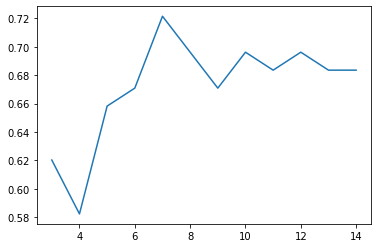

In [483]:
plt.plot(neighbors,acc_values,)

accuracy value is high when k is 7

In [484]:
classifier=KNeighborsClassifier(n_neighbors=7,metric='minkowski')
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)
accuracy_score(y_test,y_predict)


0.6835443037974683

In [485]:
confusion_matrix(y_test,y_predict)

array([[ 6, 21],
       [ 4, 48]], dtype=int64)

In [486]:
time_taken = end_time - start_time
time_taken

0.11653685569763184

# DecisionTreeClassifier

In [487]:
from sklearn.tree import DecisionTreeClassifier

In [488]:
start_time = time.time()
dt_model=DecisionTreeClassifier()

In [489]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [490]:
y_predict=dt_model.predict(x_test)
end_time=time.time()

In [491]:
accuracy_score(y_test,y_predict)


0.6582278481012658

In [492]:
confusion_matrix(y_test,y_predict)

array([[12, 15],
       [12, 40]], dtype=int64)

In [493]:
time_taken = end_time - start_time
time_taken

0.8225910663604736

# SVM

In [494]:
from sklearn.svm import SVC

In [495]:
start_time = time.time()
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
predictions=svm_linear.predict(x_test)
end_time = time.time()

In [496]:
accuracy_score(y_test,y_predict)

0.6582278481012658

In [497]:
confusion_matrix(y_test,y_predict)

array([[12, 15],
       [12, 40]], dtype=int64)

In [498]:
time_taken = end_time - start_time
time_taken

0.03168320655822754

polynomial svm

In [499]:
start_time = time.time()
svm_linear=SVC(kernel='poly',degree=3)
svm_linear.fit(x_train,y_train)
predictions=svm_linear.predict(x_test)
end_time = time.time()

In [500]:
accuracy_score(y_test,y_predict)

0.6582278481012658

In [501]:
time_taken = end_time - start_time
time_taken

0.024280309677124023

In [502]:
confusion_matrix(y_test,y_predict)

array([[12, 15],
       [12, 40]], dtype=int64)

RADIAL SVM

In [503]:
start_time = time.time()
svm_linear=SVC(kernel='rbf')
svm_linear.fit(x_train,y_train)
predictions=svm_linear.predict(x_test)
end_time = time.time()

In [504]:
accuracy_score(y_test,y_predict)

0.6582278481012658

# RANDOMFORESTCLASSIFIER

In [505]:
from sklearn.ensemble import RandomForestClassifier

In [506]:
start_time=time.time()
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
y_predict=RFC.predict(x_test)
end_time=time.time()

In [507]:
accuracy_score(y_test,y_predict)

0.6708860759493671

In [508]:
confusion_matrix(y_test,y_predict)

array([[ 6, 21],
       [ 5, 47]], dtype=int64)

In [509]:
time_taken=end_time-start_time
time_taken

0.35181427001953125

In [510]:
pd.Series(RFC.feature_importances_,index=x.columns).sort_values(ascending=False)*100

absences      10.771054
failures       7.559244
age            6.648045
goout          6.547635
freetime       5.544035
health         5.339408
Fedu           5.238594
Medu           4.847393
Mjob           4.549922
Walc           4.519178
studytime      4.247129
Fjob           3.968137
famrel         3.905840
traveltime     3.104042
Dalc           3.102182
schoolsup      2.614951
activities     2.397328
paid           2.352849
romantic       2.294033
sex            2.250055
higher         2.016594
famsup         1.990525
internet       1.786974
school         1.308966
Pstatus        1.095887
dtype: float64

# GRADIENTBOOSTINGCLASSIFIER

In [517]:
from sklearn.ensemble import GradientBoostingClassifier

In [518]:
start_time=time.time()
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_predict=GBC.predict(x_test)
end_time=time.time()

In [519]:
accuracy_score(y_test,y_predict)

0.7088607594936709

In [520]:
confusion_matrix(y_test,y_predict)

array([[13, 14],
       [ 9, 43]], dtype=int64)

In [521]:
time_taken = end_time - start_time
time_taken

0.21580004692077637

In [522]:
#The most accurate model is Logistic regression which has the Maximum Accuracy score and the time taken is also less